In [1]:
import pandas as pd
import numpy as np
import wfdb
import ast

def load_raw_data(df, sampling_rate, path):
    if sampling_rate == 100:
        data = [wfdb.rdsamp(path+f) for f in df.filename_lr]
    else:
        data = [wfdb.rdsamp(path+f) for f in df.filename_hr]
    data = np.array([signal for signal, meta in data])
    return data

path = 'C:\\Users\\sin00\\Downloads\\ecg_dataset\\'
sampling_rate=100

Y = pd.read_csv(path+'ptbxl_database.csv', index_col='ecg_id')
Y.scp_codes = Y.scp_codes.apply(lambda x: ast.literal_eval(x))

X = load_raw_data(Y, sampling_rate, path)

agg_df = pd.read_csv(path+'scp_statements.csv', index_col=0)
agg_df = agg_df[agg_df.diagnostic == 1]

def aggregate_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_class)
    return list(set(tmp))

Y['diagnostic_superclass'] = Y.scp_codes.apply(aggregate_diagnostic)

In [14]:
print(X)
print('\n')
print(Y)

[[[-1.190e-01 -5.500e-02  6.400e-02 ... -2.600e-02 -3.900e-02 -7.900e-02]
  [-1.160e-01 -5.100e-02  6.500e-02 ... -3.100e-02 -3.400e-02 -7.400e-02]
  [-1.200e-01 -4.400e-02  7.600e-02 ... -2.800e-02 -2.900e-02 -6.900e-02]
  ...
  [ 6.900e-02  0.000e+00 -6.900e-02 ...  2.400e-02 -4.100e-02 -5.800e-02]
  [ 8.600e-02  4.000e-03 -8.100e-02 ...  2.420e-01 -4.600e-02 -9.800e-02]
  [ 2.200e-02 -3.100e-02 -5.400e-02 ...  1.430e-01 -3.500e-02 -1.200e-01]]

 [[ 4.000e-03  1.380e-01  1.340e-01 ...  1.920e-01  8.300e-02  8.800e-02]
  [-2.000e-02  1.160e-01  1.360e-01 ...  1.560e-01  5.700e-02  6.300e-02]
  [-5.300e-02  9.200e-02  1.450e-01 ...  1.070e-01  1.300e-02  2.200e-02]
  ...
  [ 1.210e-01  3.980e-01  2.770e-01 ... -1.065e+00 -4.920e-01 -1.560e-01]
  [-3.260e-01  5.700e-02  3.830e-01 ... -2.800e-01 -1.750e-01 -7.100e-02]
  [-3.480e-01 -5.600e-02  2.920e-01 ... -3.080e-01 -2.310e-01 -1.450e-01]]

 [[-2.900e-02 -7.900e-02 -4.900e-02 ... -1.030e-01 -7.600e-02 -6.600e-02]
  [-3.500e-02 -7.000e-

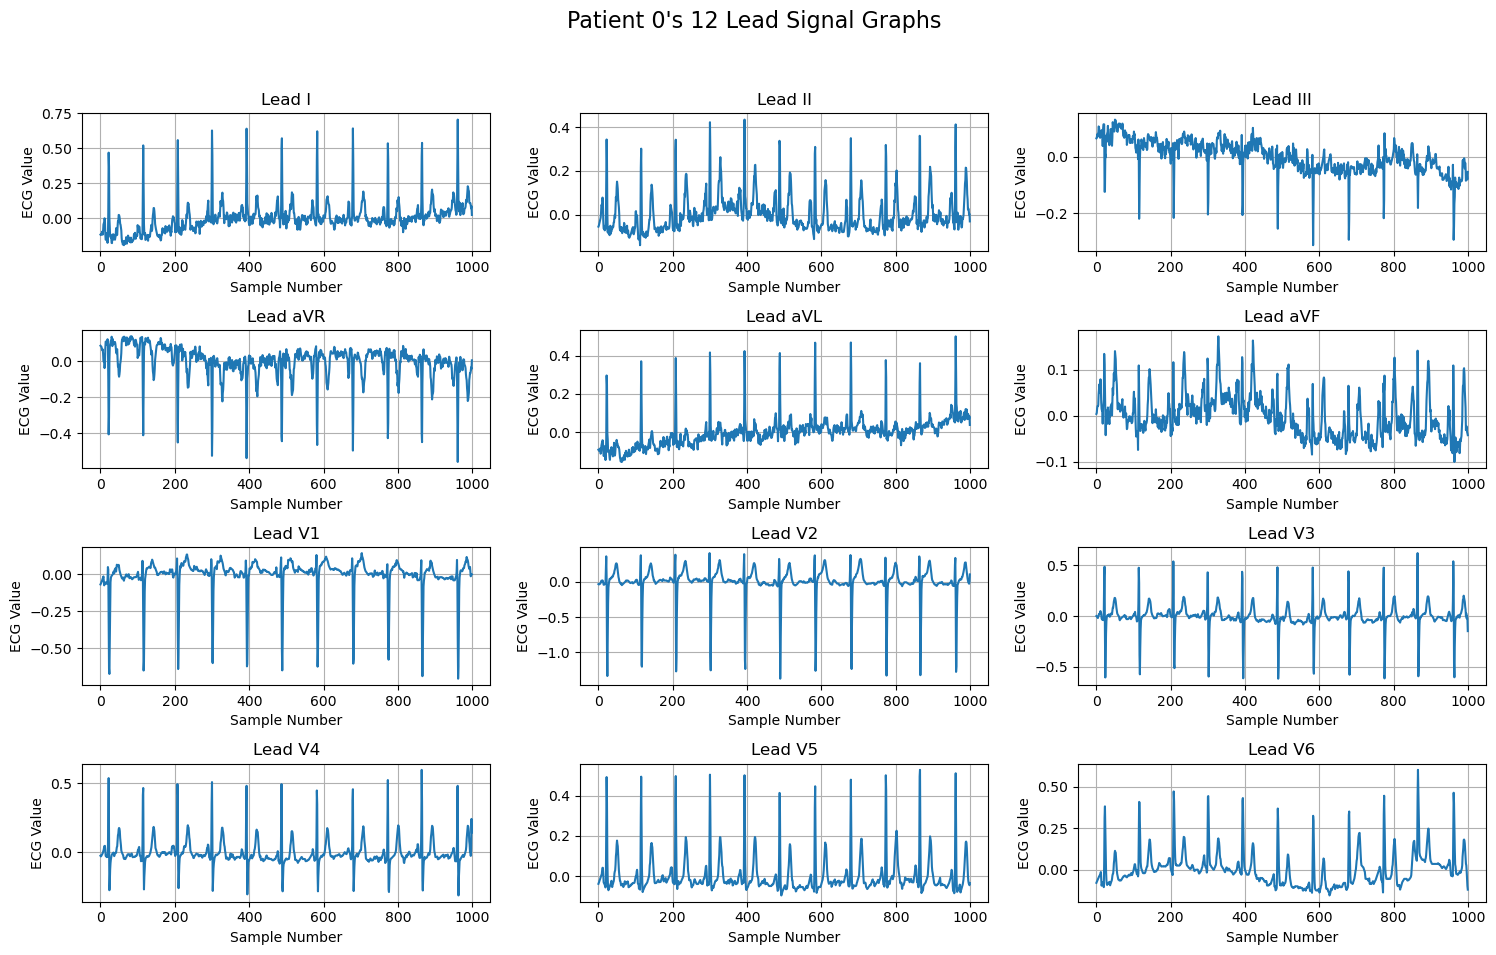

In [15]:
import matplotlib.pyplot as plt

patient_number = 0
ecg_data = X[patient_number]

# 4x3 그리드 서브플롯을 생성합니다.
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))

lead_names = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']

for i, ax in enumerate(axes.flatten()):
    ax.plot(ecg_data[:, i])
    ax.set_title(f"Lead {lead_names[i]}")
    ax.set_xlabel("Sample Number")
    ax.set_ylabel("ECG Value")
    ax.grid(True)

# Set the title for the entire figure.
fig.suptitle(f"Patient {patient_number}'s 12 Lead Signal Graphs", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the subplot layout to accommodate the title
plt.show()


ecg_id
1        [NORM]
2        [NORM]
3        [NORM]
4        [NORM]
5        [NORM]
          ...  
21833    [STTC]
21834    [NORM]
21835    [STTC]
21836    [NORM]
21837    [NORM]
Name: diagnostic_superclass, Length: 21837, dtype: object 

<class 'pandas.core.series.Series'> 

Unique Result Categories in Y['diagnostic_superclass']:
NORM
MI
nan
STTC
HYP
CD


Count of "nan" in Y['diagnostic_superclass']: 407


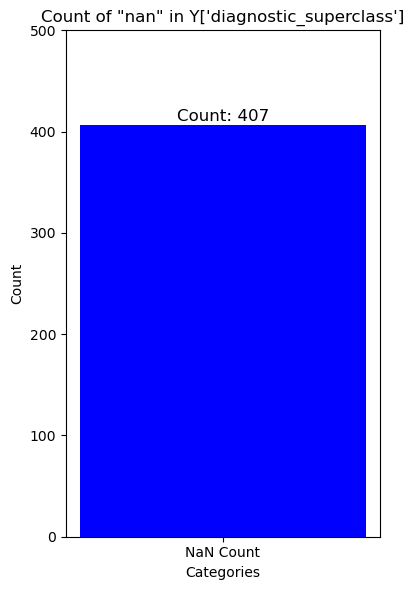

nan_count: 407


In [16]:
print(Y['diagnostic_superclass'], "\n")

print(type(Y['diagnostic_superclass']), '\n')

unique_results = Y['diagnostic_superclass'].explode().unique()
print("Unique Result Categories in Y['diagnostic_superclass']:")
for category in unique_results:
    print(category)
    
print('\n')
nan_count = Y['diagnostic_superclass'].explode().isna().sum()
print(f'Count of "nan" in Y[\'diagnostic_superclass\']: {nan_count}')

import matplotlib.pyplot as plt

# 그래프를 생성합니다. 여기서 figsize를 조정하여 가로와 세로 크기를 조절합니다.
plt.figure(figsize=(4, 6))  # Adjust the width and height as needed
plt.bar(['NaN Count'], [nan_count], color='blue', width=0.5)
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Count of "nan" in Y[\'diagnostic_superclass\']')
plt.xticks(rotation=0)  # x축 레이블의 회전 각도를 조절합니다.

# y 축의 범위를 0에서 500으로 설정합니다.
plt.ylim(0, 500)

# Add the value of nan_count as text on the bar
plt.text('NaN Count', nan_count + 1, f'Count: {nan_count}', ha='center', va='bottom', fontsize=12)

# 그래프를 표시합니다.
plt.tight_layout()
plt.show()

# Print the nan_count value
print("nan_count:", nan_count)



In [17]:
from collections import Counter

# 'diagnostic_superclass' 열의 값을 리스트에서 문자열로 변환합니다.
yListToString = Y['diagnostic_superclass'].apply(lambda x: ','.join(x) if isinstance(x, list) else x)

# 'diagnostic_superclass' 열에서 유일한 값들을 추출합니다.
unique_values = yListToString.unique()

# 각 유일한 값의 개수를 계산합니다.
value_counts = Counter(yListToString)

# 결과를 출력합니다.
for value in unique_values:
    count = value_counts[value]
    print(f'{value}: {count} 개')


NORM: 9083 개
MI: 2538 개
: 407 개
STTC: 2406 개
HYP: 536 개
CD: 1709 개
MI,STTC: 602 개
CD,HYP: 300 개
CD,MI: 1302 개
CD,STTC: 472 개
MI,HYP: 183 개
HYP,STTC: 783 개
MI,HYP,STTC: 362 개
CD,MI,HYP,STTC: 158 개
NORM,CD: 407 개
CD,MI,STTC: 223 개
CD,HYP,STTC: 211 개
NORM,STTC: 28 개
CD,MI,HYP: 117 개
NORM,CD,STTC: 5 개
NORM,CD,HYP: 2 개
NORM,HYP: 2 개
NORM,CD,MI,HYP: 1 개


NORM: 9528 개
MI: 5486 개
STTC: 5250 개
HYP: 2655 개
CD: 4907 개
NORM, MI: 1 개
NORM, STTC: 33 개
NORM, HYP: 5 개
NORM, CD: 415 개
MI, STTC: 1345 개
MI, HYP: 821 개
MI, CD: 1801 개
STTC, HYP: 1514 개
STTC, CD: 1069 개
HYP, CD: 789 개
NORM, MI, STTC: 0 개
NORM, MI, HYP: 1 개
NORM, MI, CD: 1 개
NORM, STTC, HYP: 0 개
NORM, STTC, CD: 5 개
NORM, HYP, CD: 3 개
MI, STTC, HYP: 520 개
MI, STTC, CD: 381 개
MI, HYP, CD: 276 개
STTC, HYP, CD: 369 개
NORM, MI, STTC, HYP: 0 개
NORM, MI, STTC, CD: 0 개
NORM, MI, HYP, CD: 1 개
NORM, STTC, HYP, CD: 0 개
MI, STTC, HYP, CD: 158 개
NORM, MI, STTC, HYP, CD: 0 개


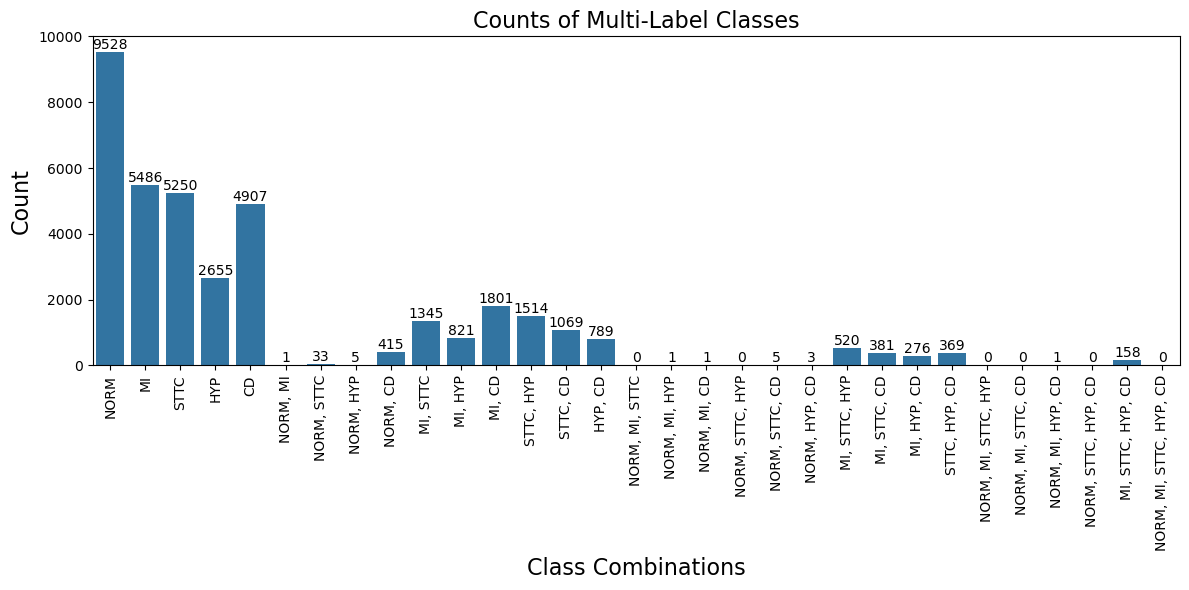

In [18]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

# PTB-XL 데이터베이스에서 생성한 'diagnostic_superclass' 열 사용
data = Y['diagnostic_superclass']

# 클래스별 개수 세기
class_counts = data.value_counts()

# 모든 가능한 클래스 목록
all_classes = ['NORM', 'MI', 'STTC', 'HYP', 'CD']

# 가능한 모든 클래스 조합 생성
all_combinations = []

for r in range(1, len(all_classes) + 1):
    combinations = itertools.combinations(all_classes, r)
    all_combinations.extend(combinations)

# 클래스 조합과 해당 개수를 저장할 딕셔너리 초기화
combination_counts = {}

# 모든 가능한 클래스 조합에 대해 데이터 개수 계산
for combination in all_combinations:
    combination_str = ', '.join(combination)  # 클래스 조합을 문자열로 변환
    count = 0
    for index, row in Y.iterrows():
        if all(c in row['diagnostic_superclass'] for c in combination):
            count += 1
    combination_counts[combination_str] = count

# 결과 출력
for combination, count in combination_counts.items():
    print(f"{combination}: {count} 개")

# 시각화
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=list(combination_counts.keys()), y=list(combination_counts.values()))
plt.xticks(rotation=90)
plt.xlabel('Class Combinations', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Counts of Multi-Label Classes', fontsize=16)

# 막대 위에 값을 표시
for i, v in enumerate(list(combination_counts.values())):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()


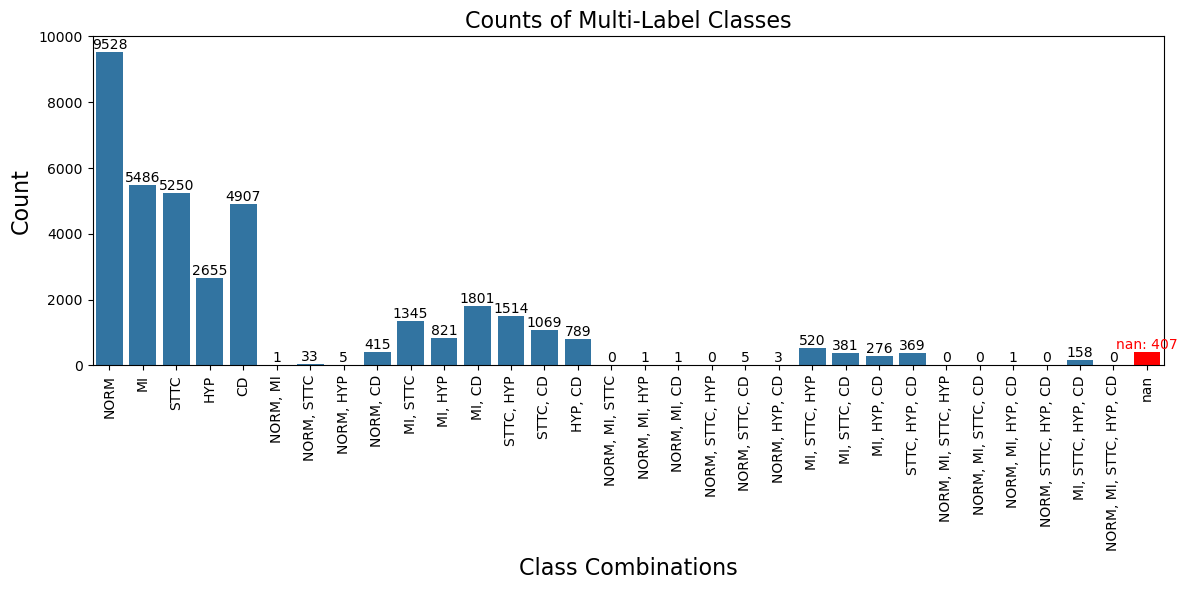

In [19]:
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

# PTB-XL 데이터베이스에서 생성한 'diagnostic_superclass' 열 사용
data = Y['diagnostic_superclass']

# 클래스별 개수 세기
class_counts = data.value_counts()

# 모든 가능한 클래스 목록
all_classes = ['NORM', 'MI', 'STTC', 'HYP', 'CD']

# 가능한 모든 클래스 조합 생성
all_combinations = []

for r in range(1, len(all_classes) + 1):
    combinations = itertools.combinations(all_classes, r)
    all_combinations.extend(combinations)

# 클래스 조합과 해당 개수를 저장할 딕셔너리 초기화
combination_counts = {}

# 모든 가능한 클래스 조합에 대해 데이터 개수 계산
for combination in all_combinations:
    combination_str = ', '.join(combination)  # 클래스 조합을 문자열로 변환
    count = 0
    for index, row in Y.iterrows():
        if all(c in row['diagnostic_superclass'] for c in combination):
            count += 1
    combination_counts[combination_str] = count

# Calculate the "nan" count
nan_count = Y['diagnostic_superclass'].explode().isna().sum()
combination_counts['nan'] = nan_count  # Add "nan" count to the dictionary

# 시각화
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=list(combination_counts.keys()), y=list(combination_counts.values()))

# Emphasize the "nan" bar
nan_index = len(combination_counts) - 1
ax.patches[nan_index].set_facecolor('red')  # Change color of the "nan" bar to red

# Adjust the label position for "nan"
for i, v in enumerate(list(combination_counts.values())):
    if i == nan_index:
        ax.text(i, v + 10, f'nan: {nan_count}', ha='center', va='bottom', color='red')
    else:
        ax.text(i, v, str(v), ha='center', va='bottom')

plt.xticks(rotation=90)
plt.xlabel('Class Combinations', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Counts of Multi-Label Classes', fontsize=16)

plt.tight_layout()
plt.show()


In [2]:
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer

# Assuming X and Y are your original data
print("삭제 전 X의 데이터 개수:", X.shape[0])
print("삭제 전 Y의 데이터 개수:", Y.shape[0])
print("삭제 전 X의 shape:", X.shape)
print("삭제 전 Y의 shape:", Y.shape)

print('\n')

# Find indices where Y['diagnostic_superclass'] is an empty list '[]'
empty_indices = Y[Y['diagnostic_superclass'].apply(lambda x: len(x) == 0)].index

# Remove corresponding rows from Y and X
Y = Y.drop(empty_indices)
X = np.delete(X, empty_indices, axis=0)

# 출력 Y와 X 데이터의 shape
print("삭제 후 Y 데이터의 shape:", Y.shape)
print("삭제 후 X 데이터의 shape:", X.shape)

# 출력 Y와 X 데이터의 개수
print("삭제 후 Y 데이터의 개수:", len(Y))
print("삭제 후 X 데이터의 개수:", len(X))

삭제 전 X의 데이터 개수: 21837
삭제 전 Y의 데이터 개수: 21837
삭제 전 X의 shape: (21837, 1000, 12)
삭제 전 Y의 shape: (21837, 28)


삭제 후 Y 데이터의 shape: (21430, 28)
삭제 후 X 데이터의 shape: (21430, 1000, 12)
삭제 후 Y 데이터의 개수: 21430
삭제 후 X 데이터의 개수: 21430


In [3]:
# Split data into train, validation, and test
test_fold = 10
validation_fold = 9

# Test
X_test = X[Y.strat_fold == test_fold]
y_test = Y[Y.strat_fold == test_fold]['diagnostic_superclass']

# Validation
X_validation = X[Y.strat_fold == validation_fold]
y_validation = Y[Y.strat_fold == validation_fold]['diagnostic_superclass']

# Train
X_train = X[(Y.strat_fold != test_fold) & (Y.strat_fold != validation_fold)]
y_train = Y[(Y.strat_fold != test_fold) & (Y.strat_fold != validation_fold)]['diagnostic_superclass']

# Convert labels to binary format
mlb = MultiLabelBinarizer()
y_train_bin = mlb.fit_transform(y_train)
y_test_bin = mlb.transform(y_test)
y_validation_bin = mlb.transform(y_validation)

# Print data counts and shapes
print("X_train의 데이터 개수:", X_train.shape[0])
print("y_train의 데이터 개수:", y_train.shape[0])
print("X_train의 shape:", X_train.shape)
print("y_train의 shape:", y_train.shape)
print('\n')

print("X_validation의 데이터 개수:", X_validation.shape[0])
print("y_validation의 데이터 개수:", y_validation.shape[0])
print("X_validation의 shape:", X_validation.shape)
print("y_validation의 shape:", y_validation.shape)
print('\n')

print("X_test의 데이터 개수:", X_test.shape[0])
print("y_test의 데이터 개수:", y_test.shape[0])
print("X_test의 shape:", X_test.shape)
print("y_test의 shape:", y_test.shape)
print('\n')

print("y_train_bin shape:", y_train_bin.shape)
print("y_test_bin shape:", y_test_bin.shape)
print("y_validation_bin shape:", y_validation_bin.shape)


X_train의 데이터 개수: 17111
y_train의 데이터 개수: 17111
X_train의 shape: (17111, 1000, 12)
y_train의 shape: (17111,)


X_validation의 데이터 개수: 2156
y_validation의 데이터 개수: 2156
X_validation의 shape: (2156, 1000, 12)
y_validation의 shape: (2156,)


X_test의 데이터 개수: 2163
y_test의 데이터 개수: 2163
X_test의 shape: (2163, 1000, 12)
y_test의 shape: (2163,)


y_train_bin shape: (17111, 5)
y_test_bin shape: (2163, 5)
y_validation_bin shape: (2156, 5)


In [4]:
class_names = ['NORM', 'CD', 'MI', 'STTC', 'HYP']

num_classes = y_train_bin.shape[1]

num_channels = 12  # Assuming you have 12 ECG leads
print("num_channels:", num_channels)

ECG_sequence_length = X_train.shape[1]

ECG_channels = X_train.shape[2]

input_channels = 12
print("input_channels:", input_channels)

input_sequence_length = ECG_sequence_length

input_length = 1000

input_shape = (1000, 12)

batch_size = 64

print("class_names:", class_names)
print("num_classes:", num_classes)
print("ECG_sequence_length:", ECG_sequence_length)
print("ECG_channels:", ECG_channels)
print("input_sequence_length:", input_sequence_length)
print("input_length:", input_length)
print("input_shape:", input_shape)
print("batch_size:", batch_size)


num_channels: 12
input_channels: 12
class_names: ['NORM', 'CD', 'MI', 'STTC', 'HYP']
num_classes: 5
ECG_sequence_length: 1000
ECG_channels: 12
input_sequence_length: 1000
input_length: 1000
input_shape: (1000, 12)
batch_size: 64


In [23]:
# gpu tensorflow
# GeForce Notebook Products - GPU	Compute Capability - GeForce GTX 1060 - 6.1
# 최신 그래픽 드라이버 설치
# https://www.tensorflow.org/install/gpu?hl=ko
# https://www.tensorflow.org/install/source_windows?hl=ko#tested_build_configurations
# 버전	파이썬 버전	컴파일러	빌드 도구	cuDNN	쿠다
# tensorflow_gpu-2.10.0	3.7-3.10	MSVC 2019	바젤 5.1.1	8.1	11.2
# https://developer.nvidia.com/cuda-toolkit-archive
# https://developer.nvidia.com/rdp/cudnn-download
# https://pypi.org/project/tensorflow-gpu/2.10.1/

# https://velog.io/@cateto/conda-tensorflow-%EB%94%A5%EB%9F%AC%EB%8B%9D-%ED%99%98%EA%B2%BD-%EA%B5%AC%EC%B6%95-2021.08.26-ver

In [34]:
import tensorflow as tf
print(tf.__version__)

# 외장 모듈 호출
%load_ext memory_profiler 
 
# 매직 커맨드를 사용한 메모리 사용량 확인
%memit

import sys
print(sys.version)

import tensorflow as tf

# TensorFlow 버전 확인
print("TensorFlow 버전:", tf.__version__)

# GPU 확인
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

2.10.1
The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
peak memory: 4454.88 MiB, increment: 0.09 MiB
3.9.18 (main, Sep 11 2023, 14:09:26) [MSC v.1916 64 bit (AMD64)]
TensorFlow 버전: 2.10.1
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8781914718539298075
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4841275392
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7519758391939192269
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1060, pci bus id: 0000:01:00.0, compute capability: 6.1"
xla_global_id: 416903419
]


In [2]:
import torch

# 현재 사용 가능한 GPU의 개수를 확인합니다.
gpu_count = torch.cuda.device_count()

if gpu_count > 0:
    print(f"현재 {gpu_count}개의 GPU가 사용 가능합니다.")
    
    # 현재 선택된 GPU 디바이스를 확인합니다.
    current_device = torch.cuda.current_device()
    print(f"현재 선택된 GPU 디바이스: {current_device}")

    # 현재 선택된 GPU의 이름을 확인합니다.
    current_device_name = torch.cuda.get_device_name(current_device)
    print(f"현재 선택된 GPU의 이름: {current_device_name}")
else:
    print("사용 가능한 GPU가 없습니다. CPU 모드로 작업 중입니다.")

현재 1개의 GPU가 사용 가능합니다.
현재 선택된 GPU 디바이스: 0
현재 선택된 GPU의 이름: NVIDIA GeForce GTX 1060


In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, GlobalAveragePooling1D
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import BatchNormalization

# 모델 정의
model = Sequential()
model.add(Conv1D(50, 10, activation='relu', input_shape=(1000, 12)))  # 입력 형태를 맞춰줍니다.
model.add(BatchNormalization())
model.add(MaxPooling1D(2))

model.add(Conv1D(150, 10, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))

model.add(Conv1D(300, 10, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))

model.add(GlobalAveragePooling1D())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='sigmoid'))  # 로짓 레이어의 출력 뉴런 수를 num_classes로 설정

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 991, 50)           6050      
                                                                 
 batch_normalization (BatchN  (None, 991, 50)          200       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 495, 50)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 486, 150)          75150     
                                                                 
 batch_normalization_1 (Batc  (None, 486, 150)         600       
 hNormalization)                                                 
                                                        

Epoch 1/30
535/535 [==============================] - 22s 35ms/step - loss: 0.3637 - accuracy: 0.6289 - val_loss: 0.3231 - val_accuracy: 0.6452
Epoch 2/30
535/535 [==============================] - 18s 34ms/step - loss: 0.3157 - accuracy: 0.6725 - val_loss: 0.3087 - val_accuracy: 0.6716
Epoch 3/30
535/535 [==============================] - 18s 34ms/step - loss: 0.3000 - accuracy: 0.6877 - val_loss: 0.3068 - val_accuracy: 0.6712
Epoch 4/30
535/535 [==============================] - 18s 34ms/step - loss: 0.2875 - accuracy: 0.6975 - val_loss: 0.3137 - val_accuracy: 0.6730
Epoch 5/30
535/535 [==============================] - 18s 34ms/step - loss: 0.2787 - accuracy: 0.7028 - val_loss: 0.3024 - val_accuracy: 0.6795
Epoch 6/30
535/535 [==============================] - 18s 34ms/step - loss: 0.2710 - accuracy: 0.7091 - val_loss: 0.2906 - val_accuracy: 0.6804
Epoch 7/30
535/535 [==============================] - 18s 34ms/step - loss: 0.2646 - accuracy: 0.7166 - val_loss: 0.3015 - val_accuracy:

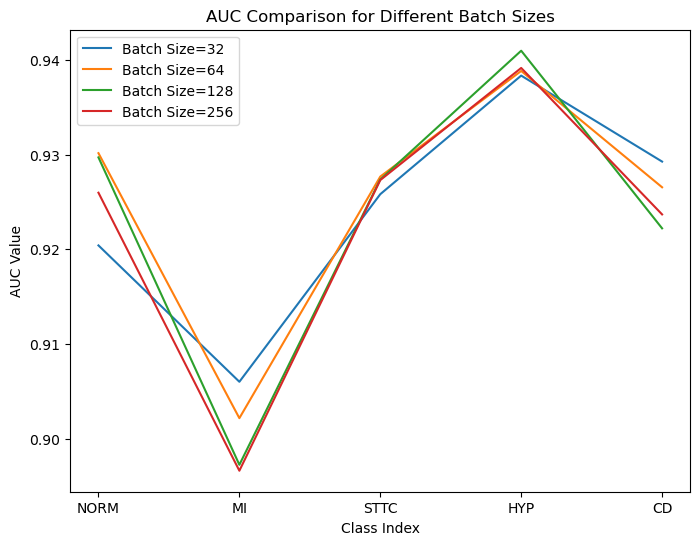

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

# 모든 클래스 목록
all_classes = ['NORM', 'MI', 'STTC', 'HYP', 'CD']

# 다양한 배치 크기를 정의합니다.
batch_sizes = [32, 64, 128, 256]

# 각 배치 크기에 대한 AUC 값을 저장할 리스트를 초기화합니다.
auc_scores = []

for batch_size in batch_sizes:
    # 모델을 초기화하고 컴파일합니다. (이전 모델을 재사용하지 않는다고 가정합니다)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Early stopping을 정의합니다.
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # 모델을 학습할 때 Early stopping 콜백을 적용합니다.
    history = model.fit(X_train, y_train_bin, validation_data=(X_validation, y_validation_bin), 
                        batch_size=batch_size, epochs=30, callbacks=[early_stopping])

    # 검증 데이터에 대한 예측을 수행합니다.
    y_pred = model.predict(X_validation)

    # 각 클래스에 대한 ROC 곡선 및 AUC 값을 계산합니다.
    roc_auc = []
    for i in range(len(all_classes)):
        fpr, tpr, _ = roc_curve(y_validation_bin[:, i], y_pred[:, i])
        roc_auc.append(auc(fpr, tpr))

    auc_scores.append(roc_auc)

# ROC 곡선을 그래프로 출력합니다.
plt.figure(figsize=(8, 6))

# 각 배치 크기에 대한 AUC 값을 그래프로 표시합니다.
for i, batch_size in enumerate(batch_sizes):
    plt.plot(range(len(all_classes)), auc_scores[i], label=f'Batch Size={batch_size}')

plt.xlabel('Class Index')
plt.ylabel('AUC Value')
plt.title('AUC Comparison for Different Batch Sizes')
plt.xticks(range(len(all_classes)), all_classes)
plt.legend()
plt.show()


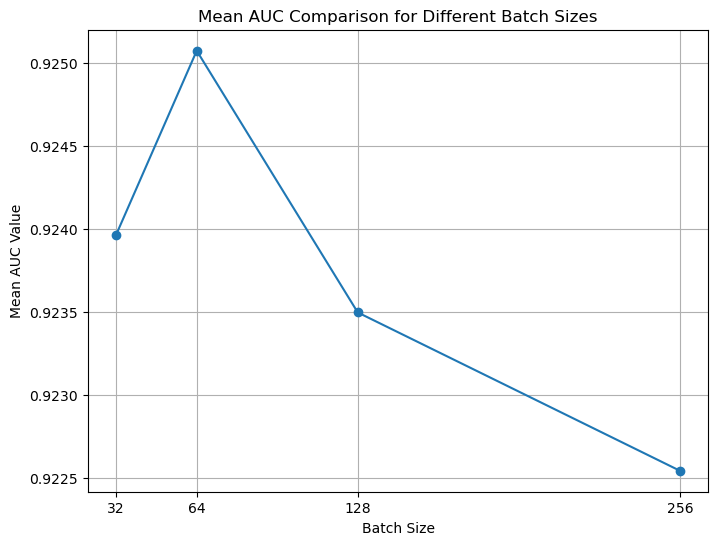

In [7]:
# 각 배치 크기 별 AUC 평균을 계산합니다.
auc_mean_scores = np.mean(auc_scores, axis=1)

# AUC 평균 그래프를 그립니다.
plt.figure(figsize=(8, 6))
plt.plot(batch_sizes, auc_mean_scores, marker='o', linestyle='-')
plt.xlabel('Batch Size')
plt.ylabel('Mean AUC Value')
plt.title('Mean AUC Comparison for Different Batch Sizes')
plt.xticks(batch_sizes)
plt.grid(True)
plt.show()


Epoch 1/30
268/268 [==============================] - 17s 53ms/step - loss: 0.4906 - accuracy: 0.5201 - val_loss: 0.7065 - val_accuracy: 0.4327
Epoch 2/30
268/268 [==============================] - 14s 50ms/step - loss: 0.3957 - accuracy: 0.5920 - val_loss: 0.4479 - val_accuracy: 0.5329
Epoch 3/30
268/268 [==============================] - 14s 51ms/step - loss: 0.3732 - accuracy: 0.6165 - val_loss: 0.3608 - val_accuracy: 0.6076
Epoch 4/30
268/268 [==============================] - 14s 51ms/step - loss: 0.3583 - accuracy: 0.6262 - val_loss: 0.3483 - val_accuracy: 0.6252
Epoch 5/30
268/268 [==============================] - 14s 51ms/step - loss: 0.3471 - accuracy: 0.6348 - val_loss: 0.3382 - val_accuracy: 0.6359
Epoch 6/30
268/268 [==============================] - 14s 51ms/step - loss: 0.3389 - accuracy: 0.6489 - val_loss: 0.3373 - val_accuracy: 0.6340
Epoch 7/30
268/268 [==============================] - 14s 51ms/step - loss: 0.3334 - accuracy: 0.6518 - val_loss: 0.3338 - val_accuracy:

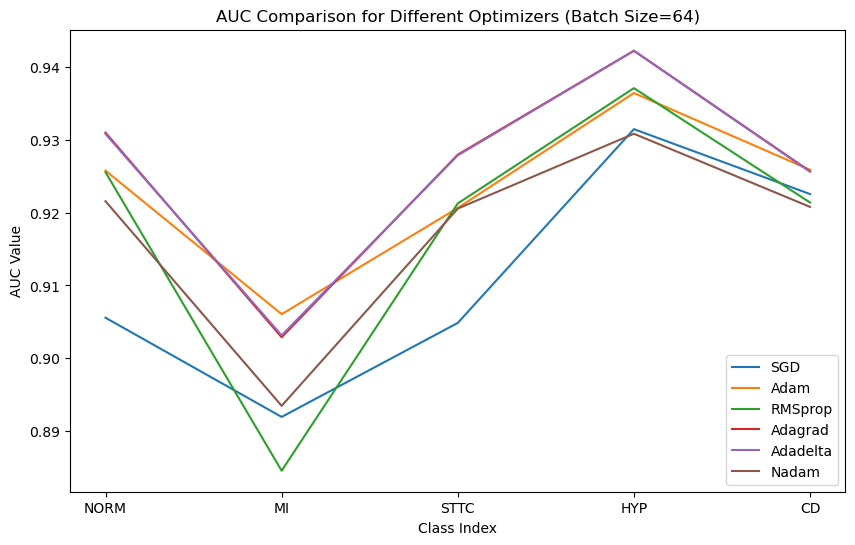

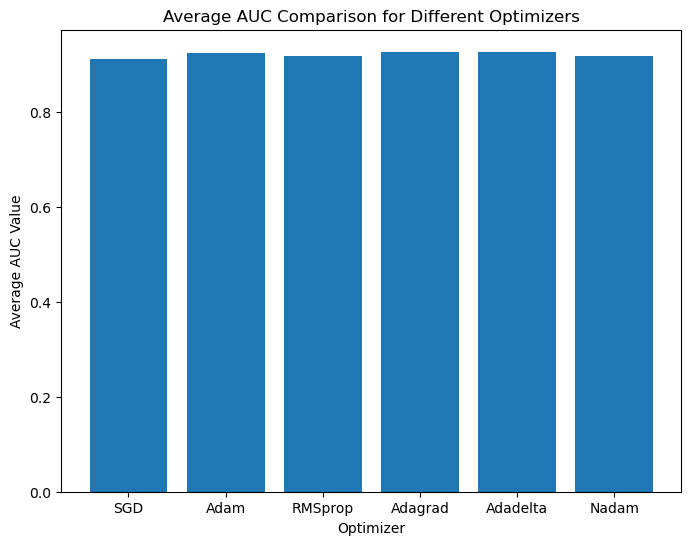

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Nadam

# 모든 클래스 목록
all_classes = ['NORM', 'MI', 'STTC', 'HYP', 'CD']

# 다양한 optimizer 목록
optimizers = [SGD(), Adam(), RMSprop(), Adagrad(), Adadelta(), Nadam()]

# 각 optimizer에 대한 AUC 값을 저장할 리스트를 초기화합니다.
optimizer_auc_scores = []

for optimizer in optimizers:
    # 모델을 초기화하고 컴파일합니다. (이전 모델을 재사용하지 않는다고 가정합니다)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Early stopping을 정의합니다.
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # 모델을 학습할 때 Early stopping 콜백을 적용합니다.
    history = model.fit(X_train, y_train_bin, validation_data=(X_validation, y_validation_bin), 
                        batch_size=64, epochs=30, callbacks=[early_stopping])

    # 검증 데이터에 대한 예측을 수행합니다.
    y_pred = model.predict(X_validation)

    # 각 클래스에 대한 ROC 곡선 및 AUC 값을 계산합니다.
    roc_auc = []
    for i in range(len(all_classes)):
        fpr, tpr, _ = roc_curve(y_validation_bin[:, i], y_pred[:, i])
        roc_auc.append(auc(fpr, tpr))

    optimizer_auc_scores.append(roc_auc)

# ROC 곡선을 그래프로 출력합니다.
plt.figure(figsize=(10, 6))

# 각 optimizer에 대한 AUC 값을 그래프로 표시합니다.
for i, optimizer in enumerate(optimizers):
    plt.plot(range(len(all_classes)), optimizer_auc_scores[i], label=type(optimizer).__name__)

plt.xlabel('Class Index')
plt.ylabel('AUC Value')
plt.title('AUC Comparison for Different Optimizers (Batch Size=64)')
plt.xticks(range(len(all_classes)), all_classes)
plt.legend()
plt.show()

# 각 optimizer의 AUC 값의 평균을 계산합니다.
average_auc_scores = np.mean(optimizer_auc_scores, axis=1)

# Optimizer 이름을 가져옵니다.
optimizer_names = [type(optimizer).__name__ for optimizer in optimizers]

# 평균 AUC 값을 그래프로 출력합니다.
plt.figure(figsize=(8, 6))
bars = plt.bar(optimizer_names, average_auc_scores)
plt.xlabel('Optimizer')
plt.ylabel('Average AUC Value')
plt.title('Average AUC Comparison for Different Optimizers')

# 각 막대 위에 레이블 추가
for bar, auc in zip(bars, average_auc_scores):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, auc + 0.01, f'{auc:.4f}', ha='center', color='black', fontsize=10)

plt.show()



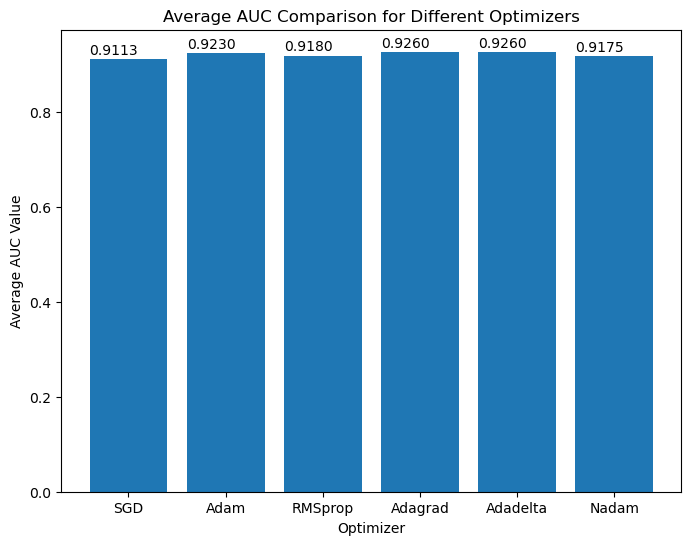

In [7]:
# 각 optimizer의 AUC 값의 평균을 계산합니다.
average_auc_scores = np.mean(optimizer_auc_scores, axis=1)

# Optimizer 이름을 가져옵니다.
optimizer_names = [type(optimizer).__name__ for optimizer in optimizers]

# 평균 AUC 값을 그래프로 출력합니다.
plt.figure(figsize=(8, 6))
bars = plt.bar(optimizer_names, average_auc_scores)
plt.xlabel('Optimizer')
plt.ylabel('Average AUC Value')
plt.title('Average AUC Comparison for Different Optimizers')

# 각 막대 위에 레이블 추가
for bar, auc in zip(bars, average_auc_scores):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, auc + 0.01, f'{auc:.4f}', ha='center', color='black', fontsize=10)

plt.show()


Epoch 1/100
268/268 [==============================] - 16s 53ms/step - loss: 0.4098 - accuracy: 0.5887 - val_loss: 0.3926 - val_accuracy: 0.5909
Epoch 2/100
268/268 [==============================] - 14s 51ms/step - loss: 0.4097 - accuracy: 0.5872 - val_loss: 0.3906 - val_accuracy: 0.5909
Epoch 3/100
268/268 [==============================] - 14s 51ms/step - loss: 0.4048 - accuracy: 0.5928 - val_loss: 0.3882 - val_accuracy: 0.5946
Epoch 4/100
268/268 [==============================] - 14s 51ms/step - loss: 0.4051 - accuracy: 0.5925 - val_loss: 0.3875 - val_accuracy: 0.5955
Epoch 5/100
268/268 [==============================] - 14s 51ms/step - loss: 0.4028 - accuracy: 0.5946 - val_loss: 0.3848 - val_accuracy: 0.5997
Epoch 6/100
268/268 [==============================] - 14s 51ms/step - loss: 0.4010 - accuracy: 0.5943 - val_loss: 0.3826 - val_accuracy: 0.5988
Epoch 7/100
268/268 [==============================] - 14s 52ms/step - loss: 0.4019 - accuracy: 0.5896 - val_loss: 0.3824 - val_ac

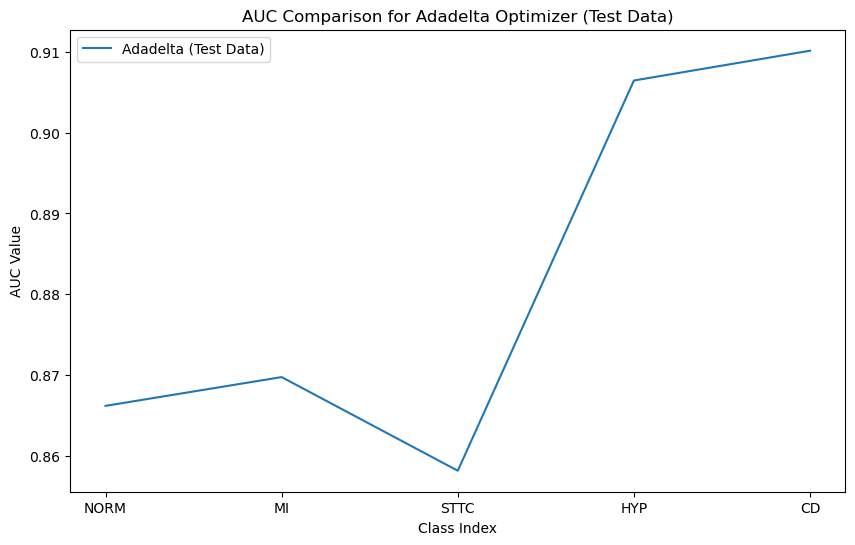

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from tensorflow.keras.optimizers import Adadelta  # Adadelta optimizer 추가

# 모든 클래스 목록
all_classes = ['NORM', 'MI', 'STTC', 'HYP', 'CD']

# Adadelta optimizer를 사용하는 경우
optimizer = Adadelta()

# AUC 값을 저장할 리스트 초기화
auc_scores = []

# 모델을 초기화하고 컴파일합니다. (이전 모델을 재사용하지 않는다고 가정합니다)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping을 정의합니다.
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 모델을 학습할 때 Early stopping 콜백을 적용합니다.
history = model.fit(X_train, y_train_bin, validation_data=(X_validation, y_validation_bin), 
                    batch_size=64, epochs=100, callbacks=[early_stopping])

# 모델 저장
model.save('cnn_adadelta_batch64_model.h5')

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 테스트 데이터에 대한 예측을 수행합니다.
y_pred_test = model.predict(X_test)

# 각 클래스에 대한 ROC 곡선 및 AUC 값을 계산합니다.
roc_auc_test = []
for i in range(len(all_classes)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_test[:, i])
    roc_auc_test.append(auc(fpr, tpr))

# ROC 곡선을 그래프로 출력합니다.
plt.figure(figsize=(10, 6))
plt.plot(range(len(all_classes)), roc_auc_test, label='Adadelta (Test Data)')  # Adadelta optimizer 사용
plt.xlabel('Class Index')
plt.ylabel('AUC Value')
plt.title('AUC Comparison for Adadelta Optimizer (Test Data)')
plt.xticks(range(len(all_classes)), all_classes)
plt.legend()
plt.show()



In [29]:
import os

model_filename = 'cnn_adadelta_batch64_model.h5'
file_size = os.path.getsize(model_filename)  # Get the file size in bytes

# Convert the file size to MB for readability
file_size_mb = file_size / (1024 * 1024)

print(f"Size of the saved model file '{model_filename}': {file_size_mb:.2f} MB")


Size of the saved model file 'cnn_adadelta_batch64_model.h5': 6.19 MB


In [31]:
import time
import tensorflow as tf  # Import TensorFlow

# Load the saved model
loaded_model = tf.keras.models.load_model('cnn_adadelta_batch64_model.h5')

# Load your test data (X_test) if it's not already loaded

# Measure inference speed
num_samples = len(X_test)
batch_size = 64  # Adjust the batch size as needed

# Make predictions on the test data while measuring time
start_time = time.time()
predictions = loaded_model.predict(X_test, batch_size=batch_size)
end_time = time.time()

inference_time = end_time - start_time
inference_speed = num_samples / inference_time  # In samples per second

print("Inference Speed:", inference_speed, "samples per second")


34/34 [==============================] - 1s 16ms/step
Inference Speed: 1181.5245510423194 samples per second


In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Concatenate, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import MultiLabelBinarizer

classes = ['NORM', 'MI', 'STTC', 'CD', 'HYP']
num_classes = len(classes)

all_classes = ['NORM', 'MI', 'STTC', 'HYP', 'CD']

def inception_module(inputs, filters, activation):
    conv1x1_1 = Conv1D(filters[0], 1, activation=activation, padding='same')(inputs)
    
    conv1x1_2 = Conv1D(filters[1], 1, activation=activation, padding='same')(inputs)
    conv3x3 = Conv1D(filters[2], 3, activation=activation, padding='same')(conv1x1_2)
    
    conv1x1_3 = Conv1D(filters[3], 1, activation=activation, padding='same')(inputs)
    conv5x5 = Conv1D(filters[4], 5, activation=activation, padding='same')(conv1x1_3)
    
    maxpool = MaxPooling1D(3, strides=1, padding='same')(inputs)
    conv1x1_4 = Conv1D(filters[5], 1, activation=activation, padding='same')(maxpool)
    
    inception_output = Concatenate(axis=-1)([conv1x1_1, conv3x3, conv5x5, conv1x1_4])
    return inception_output

def create_inception_cnn_model_with_batchnorm(input_shape, num_classes, num_cnn_layers, num_cnn_kernels, cnn_kernel_size,
                                              num_dense_layers, num_dense_units, batch_size, learning_rate, activation, optimizer):
    inputs = Input(shape=input_shape)
    
    x = Conv1D(num_cnn_kernels[0], cnn_kernel_size[0], activation=activation, padding='same')(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    for i in range(1, num_cnn_layers):
        x = Conv1D(num_cnn_kernels[i], cnn_kernel_size[i], activation=activation, padding='same')(x)
        x = MaxPooling1D(2, strides=2)(x)
        x = tf.keras.layers.BatchNormalization()(x)
    
    inception_filters = [num_cnn_kernels[num_cnn_layers - 1]] * 6
    x = inception_module(x, inception_filters, activation)
    
    x = Flatten()(x)
    for i in range(num_dense_layers):
        x = Dense(num_dense_units[i], activation=activation)(x)
        x = tf.keras.layers.BatchNormalization()(x)
    
    outputs = Dense(num_classes, activation='sigmoid')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=optimizer(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

num_cnn_layers = 4
num_cnn_kernels = [32, 128, 64, 64]
cnn_kernel_size = [7, 5, 7, 5]
num_dense_layers = 2
num_dense_units = [128, 128]
batch_size = 64
learning_rate = 0.0011
activation = 'gelu'
optimizer = tf.keras.optimizers.Adam

# Create your model with batch normalization
model_with_batchnorm = create_inception_cnn_model_with_batchnorm(input_shape, num_classes, num_cnn_layers, num_cnn_kernels, cnn_kernel_size,
                                                                 num_dense_layers, num_dense_units, batch_size, learning_rate, activation, optimizer)

clip_norm_value = 1.0  #(Adjust to an appropriate value)
optimizer_with_clipping = tf.keras.optimizers.Adam(learning_rate=learning_rate, clipnorm=clip_norm_value)

model_with_batchnorm.compile(optimizer=optimizer_with_clipping, loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Concatenate, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import MultiLabelBinarizer

classes = ['NORM', 'MI', 'STTC', 'CD', 'HYP']
num_classes = len(classes)

all_classes = ['NORM', 'MI', 'STTC', 'HYP', 'CD']

def inception_module(inputs, filters, activation):
    conv1x1_1 = Conv1D(filters[0], 1, activation=activation, padding='same')(inputs)
    
    conv1x1_2 = Conv1D(filters[1], 1, activation=activation, padding='same')(inputs)
    conv3x3 = Conv1D(filters[2], 3, activation=activation, padding='same')(conv1x1_2)
    
    conv1x1_3 = Conv1D(filters[3], 1, activation=activation, padding='same')(inputs)
    conv5x5 = Conv1D(filters[4], 5, activation=activation, padding='same')(conv1x1_3)
    
    maxpool = MaxPooling1D(3, strides=1, padding='same')(inputs)
    conv1x1_4 = Conv1D(filters[5], 1, activation=activation, padding='same')(maxpool)
    
    inception_output = Concatenate(axis=-1)([conv1x1_1, conv3x3, conv5x5, conv1x1_4])
    return inception_output

def create_inception_cnn_model_with_batchnorm(input_shape, num_classes, num_cnn_layers, num_cnn_kernels, cnn_kernel_size,
                                              num_dense_layers, num_dense_units, batch_size, learning_rate, activation, optimizer):
    inputs = Input(shape=input_shape)
    
    x = Conv1D(num_cnn_kernels[0], cnn_kernel_size[0], activation=activation, padding='same')(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    for i in range(1, num_cnn_layers):
        x = Conv1D(num_cnn_kernels[i], cnn_kernel_size[i], activation=activation, padding='same')(x)
        x = MaxPooling1D(2, strides=2)(x)
        x = tf.keras.layers.BatchNormalization()(x)
    
    inception_filters = [num_cnn_kernels[num_cnn_layers - 1]] * 6
    x = inception_module(x, inception_filters, activation)
    
    x = Flatten()(x)
    for i in range(num_dense_layers):
        x = Dense(num_dense_units[i], activation=activation)(x)
        x = tf.keras.layers.BatchNormalization()(x)
    
    outputs = Dense(num_classes, activation='sigmoid')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=optimizer(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

num_cnn_layers = 4
num_cnn_kernels = [32, 128, 64, 64]
cnn_kernel_size = [7, 5, 7, 5]
num_dense_layers = 2
num_dense_units = [128, 128]
batch_size = 64
learning_rate = 0.0011
activation = 'gelu'
optimizer = tf.keras.optimizers.Adam

# Create your model with batch normalization
model_with_batchnorm = create_inception_cnn_model_with_batchnorm(input_shape, num_classes, num_cnn_layers, num_cnn_kernels, cnn_kernel_size,
                                                                 num_dense_layers, num_dense_units, batch_size, learning_rate, activation, optimizer)

clip_norm_value = 1.0  #(Adjust to an appropriate value)
optimizer_with_clipping = tf.keras.optimizers.Adam(learning_rate=learning_rate, clipnorm=clip_norm_value)

model_with_batchnorm.compile(optimizer=optimizer_with_clipping, loss='binary_crossentropy', metrics=['accuracy'])


def lr_schedule(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

model_with_batchnorm.summary()

batch_size = 64
epochs = 50

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

history_with_batchnorm = model_with_batchnorm.fit(X_train, y_train_bin, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_validation, y_validation_bin), callbacks=[lr_scheduler])

# Evaluate the model on your test data
loss_with_batchnorm, accuracy_with_batchnorm = model_with_batchnorm.evaluate(X_test, y_test_bin, batch_size=batch_size)

print("Test Loss (with batch normalization):", loss_with_batchnorm)
print("Test Accuracy (with batch normalization):", accuracy_with_batchnorm)

# 모델을 저장할 경로 및 파일 이름 지정
model_filename = 'inception_cnn_model_with_batchnorm.h5'

# 모델 저장
model_with_batchnorm.save(model_filename)

print("모델이 저장되었습니다:", model_filename)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1000, 12)]   0           []                               
                                                                                                  
 conv1d_3 (Conv1D)              (None, 1000, 32)     2720        ['input_1[0][0]']                
                                                                                                  
 batch_normalization_3 (BatchNo  (None, 1000, 32)    128         ['conv1d_3[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 conv1d_4 (Conv1D)              (None, 1000, 128)    20608       ['batch_normalization_3[0][0]

Epoch 11/50
268/268 [==============================] - 20s 76ms/step - loss: 0.0251 - accuracy: 0.8635 - val_loss: 0.7108 - val_accuracy: 0.6401 - lr: 0.0011
Epoch 12/50
268/268 [==============================] - 20s 76ms/step - loss: 0.0342 - accuracy: 0.8653 - val_loss: 0.7246 - val_accuracy: 0.6382 - lr: 0.0011
Epoch 13/50
268/268 [==============================] - 21s 78ms/step - loss: 0.0238 - accuracy: 0.8689 - val_loss: 0.6830 - val_accuracy: 0.6224 - lr: 0.0011
Epoch 14/50
268/268 [==============================] - 21s 77ms/step - loss: 0.0202 - accuracy: 0.8698 - val_loss: 0.7521 - val_accuracy: 0.6187 - lr: 0.0011
Epoch 15/50
268/268 [==============================] - 20s 76ms/step - loss: 0.0219 - accuracy: 0.8673 - val_loss: 0.7030 - val_accuracy: 0.6364 - lr: 0.0011
Epoch 16/50
268/268 [==============================] - 20s 76ms/step - loss: 0.0251 - accuracy: 0.8689 - val_loss: 0.7246 - val_accuracy: 0.6331 - lr: 0.0011
Epoch 17/50
268/268 [==============================]

68/68 [==============================] - 2s 17ms/step


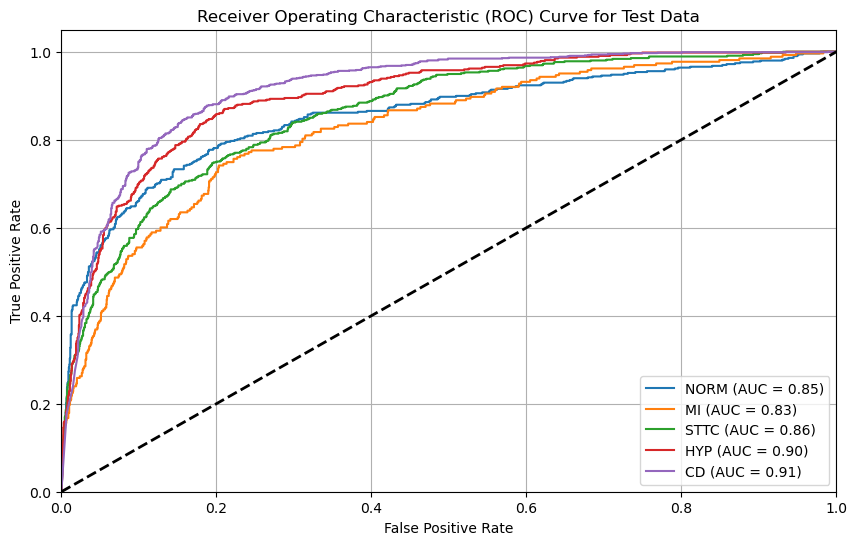

AUC for NORM: 0.85
AUC for MI: 0.83
AUC for STTC: 0.86
AUC for HYP: 0.90
AUC for CD: 0.91


In [13]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 예측 결과를 얻기 위해 모델을 사용합니다.
y_pred_test = model_with_batchnorm.predict(X_test)

# 각 클래스에 대한 ROC 곡선을 계산하고 그립니다.
fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()

# 모든 클래스에 대해 ROC 곡선을 계산합니다.
for i in range(num_classes):
    fpr_test[i], tpr_test[i], _ = roc_curve(y_test_bin[:, i], y_pred_test[:, i])
    roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])

# "all_classes" 리스트의 순서에 따라 AUC를 정렬합니다.
sorted_auc_test = [roc_auc_test[classes.index(cls)] for cls in all_classes]

# AUC 그래프를 그립니다.
plt.figure(figsize=(10, 6))
for i in range(len(all_classes)):
    plt.plot(fpr_test[classes.index(all_classes[i])], tpr_test[classes.index(all_classes[i])], label=f'{all_classes[i]} (AUC = {sorted_auc_test[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Test Data')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# 출력된 AUC 값을 확인합니다.
for i, cls in enumerate(all_classes):
    print(f'AUC for {cls}: {sorted_auc_test[i]:.2f}')


In [28]:
import os

model_filename = 'inception_cnn_model_with_batchnorm.h5'
file_size = os.path.getsize(model_filename)  # Get the file size in bytes

# Convert the file size to MB for readability
file_size_mb = file_size / (1024 * 1024)

print(f"Size of the saved model file '{model_filename}': {file_size_mb:.2f} MB")


Size of the saved model file 'inception_cnn_model_with_batchnorm.h5': 48.99 MB


In [5]:
import torch.nn as nn

# Define the CustomCNN class
class CustomCNN(nn.Module):
    def __init__(self, num_classes):
        super(CustomCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv1d(12, 50, kernel_size=10),
            nn.BatchNorm1d(50),
            nn.ReLU(),
            nn.MaxPool1d(2),
            nn.Conv1d(50, 150, kernel_size=10),
            nn.BatchNorm1d(150),
            nn.ReLU(),
            nn.MaxPool1d(2),
            nn.Conv1d(150, 300, kernel_size=10),
            nn.BatchNorm1d(300),
            nn.ReLU(),
            nn.MaxPool1d(2)
        )
        self.avg_pool = nn.AdaptiveAvgPool1d(1)
        self.dropout = nn.Dropout(0.5)
        self.fc = nn.Linear(300, num_classes)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.avg_pool(x).squeeze()
        x = self.dropout(x)
        x = self.fc(x)
        x = self.sigmoid(x)
        return x

In [19]:
from torch.optim.lr_scheduler import ReduceLROnPlateau  # Import ReduceLROnPlateau from torch.optim.lr_scheduler
import time  # Add this line to import the 'time' module

# Function to train the model with LR scheduler and model saving
def train_model_with_scheduler(model, train_loader, val_loader, num_epochs, device):

    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.BCELoss()
    scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=patience // 2, factor=0.5, verbose=True)
    best_val_loss = float('inf')
    no_improvement_count = 0
    val_accuracies = []  # Initialize a list to store validation accuracies

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        start_time = time.time()
        for batch_X, batch_Y in train_loader:
            optimizer.zero_grad()
            batch_X = batch_X.to(device, dtype=torch.float32)
            batch_Y = batch_Y.to(device, dtype=torch.float32)
            output = model(batch_X)
            loss = criterion(output, batch_Y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        average_loss = total_loss / len(train_loader)
        elapsed_time = time.time() - start_time

        model.eval()
        val_predictions = []
        val_true_labels = []
        with torch.no_grad():
            for batch_X, batch_Y in val_loader:
                batch_X = batch_X.to(device, dtype=torch.float32)
                val_output = model(batch_X)
                val_predictions.extend(val_output.cpu().numpy())
                val_true_labels.extend(batch_Y.cpu().numpy())

        val_predictions = np.array(val_predictions)
        val_true_labels = np.array(val_true_labels)

        val_accuracy = accuracy_score(val_true_labels, (val_predictions > 0.5).astype(int))
        val_accuracies.append(val_accuracy)  # Append validation accuracy to the list

        loss = criterion(torch.Tensor(val_predictions), torch.Tensor(val_true_labels))

        print(f"Epoch {epoch + 1}/{num_epochs}, "
              f"Loss: {average_loss:.4f}, "
              f"Training Accuracy: {val_accuracy:.4f}, "
              f"Validation Loss: {loss.item():.4f}, "
              f"Validation Accuracy: {val_accuracy:.4f}, "
              f"Training Time: {elapsed_time:.2f} seconds")

        # Update learning rate based on validation loss
        scheduler.step(loss)

        # Save the model if it's the best so far
        if loss < best_val_loss:
            best_val_loss = loss
            no_improvement_count = 0
            # Save the model state
            torch.save(model.state_dict(), f'best_custom_cnn_model.pth')

        if average_loss < best_val_loss:
            best_val_loss = average_loss
            no_improvement_count = 0
        else:
            no_improvement_count += 1

        if no_improvement_count >= patience:
            print(f"Early stopping at epoch {epoch + 1} due to no improvement in validation loss.")
            break

    # Calculate the average validation accuracy
    average_val_accuracy = np.mean(val_accuracies)
    return average_val_accuracy, loss.item()

In [7]:
import torch
import os

# Model Size Measurement
def print_size_of_model(model):
    torch.save(model.state_dict(), "temp.pth")
    print('Size (MB):', os.path.getsize("temp.pth")/1e6)
    os.remove('temp.pth')

In [8]:
import torch
from sklearn.preprocessing import MultiLabelBinarizer

# Convert data arrays to PyTorch tensors and transpose them
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).transpose(1, 2)
y_train_bin_tensor = torch.tensor(y_train_bin, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).transpose(1, 2)
y_test_bin_tensor = torch.tensor(y_test_bin, dtype=torch.float32)
X_validation_tensor = torch.tensor(X_validation, dtype=torch.float32).transpose(1, 2)
y_validation_bin_tensor = torch.tensor(y_validation_bin, dtype=torch.float32)


In [9]:
print("X_train_tensor 개수:", X_train_tensor.shape[0])
print("X_train_tensor shape:", X_train_tensor.shape)

print("y_train_bin_tensor 개수:", y_train_bin_tensor.shape[0])
print("y_train_bin_tensor shape:", y_train_bin_tensor.shape)

print("X_test_tensor 개수:", X_test_tensor.shape[0])
print("X_test_tensor shape:", X_test_tensor.shape)

print("y_test_bin_tensor 개수:", y_test_bin_tensor.shape[0])
print("y_test_bin_tensor shape:", y_test_bin_tensor.shape)

print("X_validation_tensor 개수:", X_validation_tensor.shape[0])
print("X_validation_tensor shape:", X_validation_tensor.shape)

print("y_validation_bin_tensor 개수:", y_validation_bin_tensor.shape[0])
print("y_validation_bin_tensor shape:", y_validation_bin_tensor.shape)


X_train_tensor 개수: 17111
X_train_tensor shape: torch.Size([17111, 12, 1000])
y_train_bin_tensor 개수: 17111
y_train_bin_tensor shape: torch.Size([17111, 5])
X_test_tensor 개수: 2163
X_test_tensor shape: torch.Size([2163, 12, 1000])
y_test_bin_tensor 개수: 2163
y_test_bin_tensor shape: torch.Size([2163, 5])
X_validation_tensor 개수: 2156
X_validation_tensor shape: torch.Size([2156, 12, 1000])
y_validation_bin_tensor 개수: 2156
y_validation_bin_tensor shape: torch.Size([2156, 5])


In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torchsummary import summary
import time

# Constants
batch_size = 64
num_epochs = 200

num_train_samples = len(X_train_tensor)
num_val_samples = len(X_validation_tensor)
print(f"Train samples: {num_train_samples}, Validation samples: {num_val_samples}")

train_dataset = TensorDataset(X_train_tensor, y_train_bin_tensor)
val_dataset = TensorDataset(X_validation_tensor, y_validation_bin_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, pin_memory=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

num_classes = y_train_bin_tensor.shape[1]

model = CustomCNN(num_classes).to(device)

val_accuracy, loss = train_model_with_scheduler(model, train_loader, val_loader, num_epochs, device)

print(f"Validation Loss: {loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

# Calculate and print model size
model_size = sum(p.numel() for p in model.parameters() if p.requires_grad) / 1e6
print(f"Model Size: {model_size:.2f} MB")

print_size_of_model(model)

# Model speed check (GPU if available)
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using GPU for inference.")
else:
    device = torch.device("cpu")
    print("GPU is not available. Using CPU for inference.")
    
model = model.to(device)
X_test_tensor_device = X_test_tensor.to(device)

num_iterations = 100
total_time = 0
for _ in range(num_iterations):
    start_time = time.time()
    with torch.no_grad():
        output = model(X_test_tensor_device)
    elapsed_time = time.time() - start_time
    total_time += elapsed_time

average_inference_time = total_time / num_iterations
print(f"Average Inference Time (Quantized Model - {device}): {average_inference_time:.4f} seconds")


Train samples: 17111, Validation samples: 2156
Epoch 1/200, Loss: 0.3616, Training Accuracy: 0.5343, Validation Loss: 0.3633, Validation Accuracy: 0.5343, Training Time: 11.05 seconds
Epoch 2/200, Loss: 0.3176, Training Accuracy: 0.5399, Validation Loss: 0.3386, Validation Accuracy: 0.5399, Training Time: 10.87 seconds
Epoch 3/200, Loss: 0.3034, Training Accuracy: 0.5821, Validation Loss: 0.3044, Validation Accuracy: 0.5821, Training Time: 10.92 seconds
Epoch 4/200, Loss: 0.2969, Training Accuracy: 0.5589, Validation Loss: 0.3239, Validation Accuracy: 0.5589, Training Time: 10.95 seconds
Epoch 5/200, Loss: 0.2873, Training Accuracy: 0.5455, Validation Loss: 0.3173, Validation Accuracy: 0.5455, Training Time: 10.99 seconds
Epoch 6/200, Loss: 0.2836, Training Accuracy: 0.5742, Validation Loss: 0.3064, Validation Accuracy: 0.5742, Training Time: 11.00 seconds
Epoch 00006: reducing learning rate of group 0 to 5.0000e-04.
Epoch 7/200, Loss: 0.2688, Training Accuracy: 0.6025, Validation Loss

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have defined num_classes and your model architecture

# Load the trained model
model = CustomCNN(num_classes)
model.load_state_dict(torch.load('custom_cnn_model.pth'))
model.eval()

# Move the model to the device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Move the test data to the same device
X_test_tensor_device = X_test_tensor.to(device)
Y_test_bin_tensor_device = y_test_bin_tensor.to(device)

# Initialize lists to store fpr, tpr, and auc for each class
fpr_list = []
tpr_list = []
roc_auc_list = []

# Loop through each class and compute ROC curve
for class_idx in range(num_classes):
    with torch.no_grad():
        # Get predicted probabilities for the current class
        class_probs = model(X_test_tensor_device)

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(Y_test_bin_tensor_device[:, class_idx].cpu().numpy(), class_probs[:, class_idx].cpu().numpy())
    
    # Compute AUC
    roc_auc = auc(fpr, tpr)
    
    # Append to lists
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    roc_auc_list.append(roc_auc)

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
for class_idx in range(num_classes):
    plt.plot(fpr_list[class_idx], tpr_list[class_idx], lw=2, label=f'Class {class_idx} (AUC = {roc_auc_list[class_idx]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [27]:
# 저장 경로 및 파일 이름 정의
model_save_path = 'custom_cnn_model.pth'

# 모델의 가중치 및 아키텍처 저장
torch.save(model.state_dict(), model_save_path)

# 모델 아키텍처는 이전에 정의한 CustomCNN 클래스에 의해 생성되었으므로
# 모델 아키텍처를 저장할 필요는 없습니다.

print(f'Model saved to {model_save_path}')


Model saved to custom_cnn_model.pth


In [5]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Convert data arrays to PyTorch tensors and transpose them
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).transpose(1, 2)
y_train_bin_tensor = torch.tensor(y_train_bin, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).transpose(1, 2)
y_test_bin_tensor = torch.tensor(y_test_bin, dtype=torch.float32)
X_validation_tensor = torch.tensor(X_validation, dtype=torch.float32).transpose(1, 2)
y_validation_bin_tensor = torch.tensor(y_validation_bin, dtype=torch.float32)

# Create DataLoader for training, testing, and validation
train_dataset = TensorDataset(X_train_tensor, y_train_bin_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_bin_tensor)
validation_dataset = TensorDataset(X_validation_tensor, y_validation_bin_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
validation_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)


In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.utils.prune as prune
from torch.utils.data import DataLoader, TensorDataset

# Instantiate your CustomCNN model
model = CustomCNN(num_classes)

# Define the training function
def train_model(model, train_loader, val_loader, num_epochs, patience, device):
    criterion = nn.BCEWithLogitsLoss()  # Use BCEWithLogitsLoss for multi-label classification
    optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adjust the optimizer and learning rate

    best_val_accuracy = 0.0
    no_improvement_count = 0

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels.float())  # Convert labels to float
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()  # Predicted values are now float tensors
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_accuracy = correct / total
        train_loss = total_loss / len(train_loader)

        model.eval()
        correct = 0
        total = 0
        total_val_loss = 0.0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels.float())  # Convert labels to float
                total_val_loss += loss.item()
                predicted = (torch.sigmoid(outputs) > 0.5).float()
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

            val_accuracy = correct / total
            val_loss = total_val_loss / len(val_loader)

            print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

            if val_accuracy > best_val_accuracy:
                best_val_accuracy = val_accuracy
                no_improvement_count = 0
            else:
                no_improvement_count += 1

            if no_improvement_count >= patience:
                print("Early stopping due to no improvement.")
                break

    return model, best_val_accuracy

# Set hyperparameters
num_epochs = 200
batch_size = 64
patience = 5  # You can adjust this value
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate the CustomCNN model
model = CustomCNN(num_classes=num_classes)  # Adjust the number of classes accordingly
model.to(device)

# Define data tensors and DataLoader for training and validation
train_dataset = TensorDataset(X_train_tensor, y_train_bin_tensor)
val_dataset = TensorDataset(X_validation_tensor, y_validation_bin_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, pin_memory=True)

# Train the model
model, best_val_accuracy = train_model(model, train_loader, val_loader, num_epochs, patience, device)

# Apply pruning to the model
def apply_pruning(model):
    for name, module in model.named_modules():
        if isinstance(module, nn.Conv1d) or isinstance(module, nn.Linear):
            prune.l1_unstructured(module, name='weight', amount=0.2)  # Adjust the pruning amount as needed

apply_pruning(model)

# Now, recompile the model to remove the pruned weights
for name, module in model.named_modules():
    if isinstance(module, nn.Conv1d) or isinstance(module, nn.Linear):
        prune.remove(module, 'weight')

# You can also check the sparsity of your model
def count_nonzero_parameters(model):
    total = 0
    nonzero = 0
    for name, module in model.named_modules():
        if isinstance(module, nn.Conv1d) or isinstance(module, nn.Linear):
            total += module.weight.nelement()
            nonzero += module.weight.nonzero().size(0)
    sparsity = nonzero / total
    return sparsity

sparsity = count_nonzero_parameters(model)
print(f"Sparsity of the pruned model: {sparsity * 100:.2f}%")

# Finally, save the pruned model to a file
torch.save(model.state_dict(), 'pruned_custom_cnn_model.pth')


Epoch 1/200 - Train Loss: 0.6733, Train Accuracy: 1.3023, Validation Loss: 0.6712, Validation Accuracy: 1.3047
Epoch 2/200 - Train Loss: 0.6582, Train Accuracy: 1.3525, Validation Loss: 0.6598, Validation Accuracy: 1.4137
Epoch 3/200 - Train Loss: 0.6548, Train Accuracy: 1.4349, Validation Loss: 0.6687, Validation Accuracy: 1.5538
Epoch 4/200 - Train Loss: 0.6535, Train Accuracy: 1.5566, Validation Loss: 0.6562, Validation Accuracy: 1.5431
Epoch 5/200 - Train Loss: 0.6518, Train Accuracy: 1.6590, Validation Loss: 0.6578, Validation Accuracy: 1.6016
Epoch 6/200 - Train Loss: 0.6516, Train Accuracy: 1.7971, Validation Loss: 0.6537, Validation Accuracy: 1.6252
Epoch 7/200 - Train Loss: 0.6500, Train Accuracy: 1.8973, Validation Loss: 0.6534, Validation Accuracy: 1.8400
Epoch 8/200 - Train Loss: 0.6495, Train Accuracy: 2.0297, Validation Loss: 0.6594, Validation Accuracy: 1.8757
Epoch 9/200 - Train Loss: 0.6493, Train Accuracy: 2.1110, Validation Loss: 0.6549, Validation Accuracy: 2.0983
E

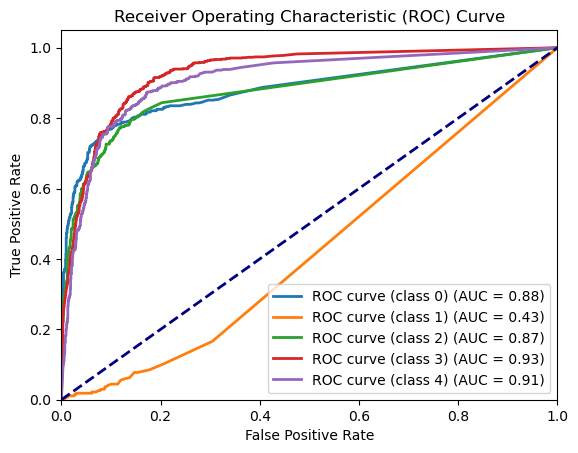

AUC for each class: {0: 0.8803399056181574, 1: 0.4284357962943025, 2: 0.8746772825135016, 3: 0.9294849504506979, 4: 0.9090195901855109}


In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.utils.prune as prune
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# After the model has been trained and pruned, you can calculate and plot the ROC curve for each class:
def calculate_roc_auc(model, val_loader, device):
    model.eval()
    y_true = []
    y_scores = []

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            predicted = torch.sigmoid(outputs)  # Apply sigmoid to obtain probabilities
            y_true.append(labels.cpu().numpy())
            y_scores.append(predicted.cpu().numpy())

    y_true = np.concatenate(y_true)
    y_scores = np.concatenate(y_scores)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot the ROC curve
    plt.figure()
    lw = 2

    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], lw=lw, label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    return roc_auc

roc_auc = calculate_roc_auc(model, val_loader, device)
print(f"AUC for each class: {roc_auc}")

In [47]:
import torch
import os

# Load the pruned model
model = CustomCNN(num_classes)  # Replace with the appropriate model class
model.load_state_dict(torch.load('pruned_custom_cnn_model.pth'))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)  # Move the model to the same device as the input data
model.eval()

# Define the rest of the code
def get_model_size(model):
    total_params = sum(p.numel() for p in model.parameters())
    model_size = total_params * 4 / (1024 ** 2)  # Size in MB (assuming 32-bit floats)
    return model_size

model_size = get_model_size(model)
print(f"Model Size: {model_size:.2f} MB")

import time

input_channels = 12  # Number of ECG channels
input_length = 1000  # Length of the ECG signal

# Create a random input tensor for inference testing
input_tensor = torch.randn(1, input_channels, input_length, device=device)  # Assuming batch size is 1
# The input tensor is created on the same device as the model

def measure_inference_speed(model, input_tensor):
    model.eval()
    start_time = time.time()
    with torch.no_grad():
        output = model(input_tensor)
    end_time = time.time()
    inference_time = end_time - start_time
    return inference_time

inference_time = measure_inference_speed(model, input_tensor)
print(f"Inference Speed: {1 / inference_time:.2f} FPS (Frames per Second)")


Model Size: 2.04 MB
Inference Speed: 129.93 FPS (Frames per Second)
